In [1]:
# imports
import requests
import json
from dateutil import parser
import pandas as pd
import messagebird

# clearly see columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

import time
import math
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
from collections import Counter
import numpy as np
import time

# clear output
from IPython.display import clear_output

# use nba_api to fetch data
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType

In [2]:
# fetch seasons which advanced analitics data
season_list = ['2020-21', '2021-22', '2022-23']
# season_list = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

In [3]:
# fetch NBA team ID / name / abbreviation 
nba_teams = teams.get_teams()
nba_teams_id = [team['id'] for team in nba_teams]
nba_teams_tri= [team['abbreviation'] for team in nba_teams]
nba_teams_name= [team['full_name'] for team in nba_teams]

# create the master games 
master_game_dict = dict()
master_game_list = list()

for year in season_list:
    for team in nba_teams_id:
        print("Team: {}, Season: {}".format(nba_teams_tri[nba_teams_id.index(team)], year))
#         create games dataframe
        temp_dp = leaguegamefinder.LeagueGameFinder(team_id_nullable=team, 
                                                    season_nullable=year,
                                                    season_type_nullable=SeasonType.regular).get_data_frames()[0]
        temp_dp.sort_values(by='GAME_ID', inplace=True)
        temp_dp.reset_index(drop=True, inplace=True)
        
        master_game_list.append(temp_dp)
        
        if nba_teams_tri[nba_teams_id.index(team)] in master_game_dict:
            master_game_dict[nba_teams_tri[nba_teams_id.index(team)]].append(temp_dp)
            
        else:
            master_game_dict[nba_teams_tri[nba_teams_id.index(team)]] = [temp_dp]
        
        time.sleep(1.5)
        clear_output(wait=True)

Team: CHA, Season: 2022-23


In [4]:
# Print single entry for the Hornets 
master_game_dict['CHA'][1]

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612766,CHA,Charlotte Hornets,0022100003,2021-10-20,CHA vs. IND,W,239,123,46,107,0.430,13,31,0.419,18,27,0.667,12,34,46,29,9,5,8,21,1.0
1,22021,1610612766,CHA,Charlotte Hornets,0022100017,2021-10-22,CHA @ CLE,W,240,123,48,91,0.527,13,32,0.406,14,17,0.824,11,35,46,32,13,1,18,16,11.0
2,22021,1610612766,CHA,Charlotte Hornets,0022100035,2021-10-24,CHA @ BKN,W,241,111,43,94,0.457,10,30,0.333,15,19,0.789,10,38,48,26,10,5,12,17,16.0
3,22021,1610612766,CHA,Charlotte Hornets,0022100041,2021-10-25,CHA vs. BOS,L,266,129,46,103,0.447,19,44,0.432,18,28,0.643,14,38,52,26,4,6,14,25,-11.0
4,22021,1610612766,CHA,Charlotte Hornets,0022100055,2021-10-27,CHA @ ORL,W,240,120,43,83,0.518,14,30,0.467,20,24,0.833,10,30,40,22,14,4,16,14,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,22021,1610612766,CHA,Charlotte Hornets,0022101161,2022-04-02,CHA @ PHI,L,241,114,42,87,0.483,11,30,0.367,19,24,0.792,7,25,32,34,14,1,17,18,-30.0
78,22021,1610612766,CHA,Charlotte Hornets,0022101181,2022-04-05,CHA @ MIA,L,238,115,45,85,0.529,12,38,0.316,13,18,0.722,7,24,31,34,8,3,13,18,-29.0
79,22021,1610612766,CHA,Charlotte Hornets,0022101196,2022-04-07,CHA vs. ORL,W,241,128,48,92,0.522,12,34,0.353,20,27,0.741,10,46,56,29,9,10,11,17,27.0
80,22021,1610612766,CHA,Charlotte Hornets,0022101208,2022-04-08,CHA @ CHI,W,241,133,52,86,0.605,19,40,0.475,10,10,1.000,8,30,38,34,7,4,11,21,16.0


In [5]:
# function to fetch first game day of every season in a list
def get_first_match(game_dict, season_list, nba_teams_tri):
    first_game_list = list()
    for season_index in range(len(season_list)):
        temp_list = list()
        for team in nba_teams_tri:
            temp_list.append(game_dict[team][season_index].loc[0]['GAME_DATE'])
        first_game_list.append(min(temp_list))
    return first_game_list
first_game_list = get_first_match(master_game_dict, season_list, nba_teams_tri)

In [6]:
# craete dict entry for each team, give initial ELO and season start date
teamDict = dict()
for entry in nba_teams_tri:
    tempDict = dict()
    tempDict['tri'] = entry
    tempDict['ELO'] = 1500 
    tempDict['History'] = [{'date': parser.parse(master_game_dict[entry][0].loc[0]['GAME_DATE']).date(), 'ELO': tempDict['ELO']}]
    teamDict[entry] = tempDict

In [7]:
# build intial dataframe detailing all games, split by team
master_games_df = pd.concat(master_game_list)
master_games_df.sort_values(by='GAME_ID', inplace=True)
master_games_df.reset_index(drop=True, inplace=True)
master_games_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000001,2020-12-22,GSW @ BKN,L,240,99,37,99,0.374,10,33,0.303,15,23,0.652,13,34,47,26,6,6,18,24,-26.0
1,22020,1610612751,BKN,Brooklyn Nets,0022000001,2020-12-22,BKN vs. GSW,W,242,125,42,92,0.457,15,35,0.429,26,32,0.813,13,44,57,24,11,7,20,22,26.0
2,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,109,38,81,0.469,9,29,0.310,24,31,0.774,8,37,45,22,4,2,19,20,-7.0
3,22020,1610612746,LAC,LA Clippers,0022000002,2020-12-22,LAC @ LAL,W,241,116,44,93,0.473,14,40,0.350,14,19,0.737,11,29,40,22,10,3,16,29,7.0
4,22020,1610612749,MIL,Milwaukee Bucks,0022000003,2020-12-23,MIL @ BOS,L,239,121,46,90,0.511,14,35,0.400,15,18,0.833,11,41,52,19,4,6,16,20,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,22022,1610612738,BOS,Boston Celtics,0022200969,2023-03-05,BOS vs. NYK,L,289,129,43,109,0.394,21,59,0.356,22,25,0.880,17,37,54,27,8,5,16,28,-2.0
6556,22022,1610612746,LAC,LA Clippers,0022200970,2023-03-05,LAC vs. MEM,W,239,135,45,85,0.529,12,29,0.414,33,35,0.943,13,40,53,25,6,2,17,17,6.0
6557,22022,1610612763,MEM,Memphis Grizzlies,0022200970,2023-03-05,MEM @ LAC,L,240,129,50,92,0.543,18,34,0.529,11,15,0.733,2,24,26,32,13,3,8,23,-6.0
6558,22022,1610612749,MIL,Milwaukee Bucks,0022200973,2023-03-05,MIL @ WAS,W,240,117,39,84,0.464,22,49,0.449,17,22,0.773,8,38,46,30,5,6,12,15,6.0


In [8]:
# api to fetch boxscores by game id
from nba_api.live.nba.endpoints import boxscore

# list that contains all game stats 
master_games_stats_list = list()

# list of all games by their id,. sorted 
game_id_list = set([master_games_df['GAME_ID'] for game in master_games_df][0])
game_id_list = list(game_id_list)
game_id_list.sort()

# index used to detect change in season
season_index = 0

# loop to calculate team ELO per game / saeson
# algorithm based from ELO calculation
for game_id in game_id_list:
    
    box = boxscore.BoxScore(game_id) 
    
    if box.get_dict()['meta']['code'] == 200:
        # game id
        game_id = box.get_dict()['game']['gameId']
        # game date
        game_date = parser.parse(box.get_dict()['game']['gameTimeUTC']).date()
        # team code
        home_tri = box.get_dict()['game']['homeTeam']['teamTricode']
        away_tri = box.get_dict()['game']['awayTeam']['teamTricode']

        print('game id: {} \t home team: {} \t away team: {}'.format(game_id, home_tri, away_tri))

        # team stats
        box_home = box.get_dict()['game']['homeTeam']['statistics']
        box_away = box.get_dict()['game']['awayTeam']['statistics']

        if game_date >= parser.parse(first_game_list[season_index]).date(): 
            if season_index < (len(first_game_list) - 1):
                if game_date >= parser.parse(first_game_list[season_index + 1]).date():
                    print('Season Change')
                    # season change
                    season_index = season_index + 1
                    for teamKey in list(teamDict.keys()):
                        teamDict[teamKey]['ELO'] = (teamDict[teamKey]['ELO'] * 0.75) + (0.25 * 1505)

            if box_home['points'] > box_away['points']: # home team win 
                print('home win', '\n')
            # Winner  ELO
                # S Team
                Steam = 1
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[away_tri]['ELO'] - teamDict[home_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[home_tri]['ELO']
                # k
                MOV = int(box_home['points']) - int(box_away['points'])
                ################## Error Maybe Here ##################
                # ELO_diff
                ELOdiff = teamDict[home_tri]['ELO'] + 100 - teamDict[away_tri]['ELO']
                k = 20 * (pow((MOV + 3),0.8) / (7.5 + (0.006 * (ELOdiff))))
                ######################################################
                # Ri+1
                WinnerRii = Ri + (k * (Steam - Eteam))

            # Loser ELO
                # S Team
                Steam = 0
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[home_tri]['ELO'] - teamDict[away_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[away_tri]['ELO']
                # Ri+1
                LoserRii = Ri + (k * (Steam - Eteam))

                print('Home ELO: {} \t Away ELO: {}'.format(WinnerRii, LoserRii))

            # Setting new ELO   
                box_home['team_elo'] = teamDict[home_tri]['ELO']
                box_home['opp_elo'] = teamDict[away_tri]['ELO']
                box_away['team_elo'] = teamDict[away_tri]['ELO']
                box_away['opp_elo'] = teamDict[home_tri]['ELO']

            # Winner 
                box_home['game_id'] = game_id
                box_home['game_date'] = game_date 
                box_home['home'] = 1
                box_home['team_name'] = home_tri   
                box_home['opp_name'] = away_tri   
                box_home['win'] = 1
                teamDict[home_tri]['ELO'] = math.floor(WinnerRii)
            # Loser
                box_away['game_id'] = game_id
                box_away['game_date'] = game_date 
                box_away['team_name'] = away_tri  
                box_away['opp_name'] = home_tri
                box_away['home'] = 0
                box_away['win'] = 0
                teamDict[away_tri]['ELO'] = math.floor(LoserRii)

            elif box_home['points'] < box_away['points']: # home lose
                print('away win', '\n')

            # Winner  ELO
                # S Team
                Steam = 1
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[home_tri]['ELO'] - teamDict[away_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[away_tri]['ELO']
                # k
                MOV = int(box_away['points']) - int(box_home['points'])
                ################## Error Maybe Here ##################
                # ELO_diff
                ELOdiff = (teamDict[home_tri]['ELO'] + 100 - teamDict[away_tri]['ELO']) * (-1)
                k = 20 * (pow((MOV + 3),0.8) / (7.5 + (0.006 * (ELOdiff))))
                ######################################################
                # Ri+1
                WinnerRii = Ri + (k * (Steam - Eteam))
            # Loser ELO
                # S Team
                Steam = 0
                # E Team
                Eteam = 1 / (1 + (pow(10, ((teamDict[away_tri]['ELO'] - teamDict[home_tri]['ELO']) / 400))))
                # Ri
                Ri = teamDict[home_tri]['ELO'] ## CHECK THIS 
                # Ri+1
                LoserRii = Ri + (k * (Steam - Eteam))

                print('Home ELO: {} \t Away ELO: {}'.format(WinnerRii, LoserRii))

            # Setting new ELO
                box_away['team_elo'] = teamDict[away_tri]['ELO']
                box_away['opp_elo'] = teamDict[home_tri]['ELO']
                box_home['team_elo'] = teamDict[home_tri]['ELO']
                box_home['opp_elo'] = teamDict[away_tri]['ELO']

            # Winner 
                box_away['game_id'] = game_id 
                box_away['game_date'] = game_date 
                box_away['team_name'] = away_tri  
                box_away['opp_name'] = home_tri
                box_away['home'] = 0       
                box_away['win'] = 1
                teamDict[away_tri]['ELO'] = math.floor(WinnerRii)
            # Loser
                box_home['game_id'] = game_id
                box_home['game_date'] = game_date 
                box_home['team_name'] = home_tri   
                box_home['opp_name'] = away_tri  
                box_home['home'] = 1
                box_home['win'] = 0 
                teamDict[home_tri]['ELO'] = math.floor(LoserRii)        

        # Setting Historical ELO
            teamDict[home_tri]['History'].append({'date': game_date, 
                                                  'ELO': box_home['team_elo']})
            teamDict[away_tri]['History'].append({'date': game_date, 
                                                  'ELO': box_away['team_elo']})
            master_games_stats_list.append(box_home)
            master_games_stats_list.append(box_away)

            time.sleep(1)
            clear_output(wait=True)

game id: 0022200973 	 home team: WAS 	 away team: MIL
away win 

Home ELO: 1564.8281157323338 	 Away ELO: 1424.1718842676662


In [9]:
# dataframe that contains all game stats and team ELO
df = pd.DataFrame(master_games_stats_list)
df.sort_values(by=(['game_date', 'game_id']), inplace=True)
# drop entries which contain no data (at some point)
# df=df.dropna().reset_index(drop=True)
df

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,minutes,minutesCalculated,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timeLeading,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win
0,24,1.200000,54,38,78-116,11,49-80,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,PT240M00.00S,PT240M,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,PT46M49.00S,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1
1,26,1.444444,35,2,2-0,11,49-80,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,PT240M00.00S,PT240M,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,PT00M38.00S,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0
2,22,1.157895,46,0,NaN,10,41-30,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,PT240M00.00S,PT240M,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,PT00M00.00S,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0
3,22,1.375000,29,22,39-17,10,41-30,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,PT240M00.00S,PT240M,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,PT47M13.00S,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1
4,23,3.285714,34,17,84-101,10,48-49,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,PT240M00.00S,PT240M,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,PT24M03.05S,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,18,0.900000,16,11,100-89,13,92-87,4,5,9,3,0.333333,95,0.573684,47,0.494737,6,28,27,21,1,0,32,22,0.687500,12,PT290M00.00S,PT290M,131,129,6,24,56,43,28,0.651163,7,43,11,54,10,2,8,64,7,2,0.285714,7,41,15,0.365854,PT28M10.81S,15,109.08,0.600477,19,1,20,54,32,0.592593,1534.0,1534.0,0022200969,2023-03-06,0,NYK,BOS,1
6556,25,1.470588,39,11,56-67,17,121-124,2,3,8,4,0.500000,85,0.600000,45,0.529412,0,23,17,17,0,0,35,33,0.942857,13,PT240M00.00S,PT240M,135,129,9,13,50,42,25,0.595238,21,40,13,53,7,2,5,60,10,6,0.600000,6,29,12,0.413793,PT24M46.98S,5,100.40,0.672311,17,0,17,56,33,0.589286,1411.0,1509.0,0022200970,2023-03-06,1,LAC,MEM,1
6557,32,4.000000,29,16,109-93,15,121-122,3,2,13,10,0.769231,92,0.641304,50,0.543478,1,17,23,22,0,0,15,11,0.733333,13,PT240M00.00S,PT240M,129,135,26,26,64,56,32,0.571429,2,24,2,26,2,0,2,28,3,1,0.333333,13,34,18,0.529412,PT21M10.00S,5,98.60,0.654158,8,0,8,58,32,0.551724,1509.0,1411.0,0022200970,2023-03-06,0,MEM,LAC,0
6558,21,2.333333,34,4,5-9,10,83-86,2,6,3,1,0.333333,108,0.462963,46,0.42

In [10]:
# create season feature
def create_season(row):
    if '00220' in row['game_id']:
        return '2020'
    if '00221' in row['game_id']:
        return '2021'
    if '00222' in row['game_id']:
        return '2022'
df['season'] = df.apply (lambda row: create_season(row), axis=1)

In [11]:
df

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,minutes,minutesCalculated,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timeLeading,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season
0,24,1.200000,54,38,78-116,11,49-80,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,PT240M00.00S,PT240M,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,PT46M49.00S,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1,2020
1,26,1.444444,35,2,2-0,11,49-80,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,PT240M00.00S,PT240M,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,PT00M38.00S,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0,2020
2,22,1.157895,46,0,NaN,10,41-30,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,PT240M00.00S,PT240M,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,PT00M00.00S,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0,2020
3,22,1.375000,29,22,39-17,10,41-30,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,PT240M00.00S,PT240M,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,PT47M13.00S,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1,2020
4,23,3.285714,34,17,84-101,10,48-49,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,PT240M00.00S,PT240M,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,PT24M03.05S,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,18,0.900000,16,11,100-89,13,92-87,4,5,9,3,0.333333,95,0.573684,47,0.494737,6,28,27,21,1,0,32,22,0.687500,12,PT290M00.00S,PT290M,131,129,6,24,56,43,28,0.651163,7,43,11,54,10,2,8,64,7,2,0.285714,7,41,15,0.365854,PT28M10.81S,15,109.08,0.600477,19,1,20,54,32,0.592593,1534.0,1534.0,0022200969,2023-03-06,0,NYK,BOS,1,2022
6556,25,1.470588,39,11,56-67,17,121-124,2,3,8,4,0.500000,85,0.600000,45,0.529412,0,23,17,17,0,0,35,33,0.942857,13,PT240M00.00S,PT240M,135,129,9,13,50,42,25,0.595238,21,40,13,53,7,2,5,60,10,6,0.600000,6,29,12,0.413793,PT24M46.98S,5,100.40,0.672311,17,0,17,56,33,0.589286,1411.0,1509.0,0022200970,2023-03-06,1,LAC,MEM,1,2022
6557,32,4.000000,29,16,109-93,15,121-122,3,2,13,10,0.769231,92,0.641304,50,0.543478,1,17,23,22,0,0,15,11,0.733333,13,PT240M00.00S,PT240M,129,135,26,26,64,56,32,0.571429,2,24,2,26,2,0,2,28,3,1,0.333333,13,34,18,0.529412,PT21M10.00S,5,98.60,0.654158,8,0,8,58,32,0.551724,1509.0,1411.0,0022200970,2023-03-06,0,MEM,LAC,0,2022
6558,21,2.333333,34,4

In [12]:
# remove features that are not needed 
del df['biggestLeadScore']
del df['biggestScoringRunScore']
del df['minutes']
del df['minutesCalculated']
del df['timeLeading']

In [13]:
# load models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# create model that predicts games win / loss based on current game performance
# Test / Train Split
features = df.drop(columns = ['game_id', 'game_date', 
                              'team_name', 'opp_name', 'win'])
label = df['win']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.4)
# create complex Logistic Regression  
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

clear_output(wait=True)

print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_log)))
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest: ' + '\t\t' + str(metrics.accuracy_score(y_test, y_pred_rf)))

Logistic Regression: 	1.0
Random Forest: 		0.9333079268292683


In [14]:
seasonAllStatSplitPred = df.to_dict('records')
seasonAllStatSplitPredList = list()
for game_one in seasonAllStatSplitPred:
    teamPairID_one = [game_one['team_name'], game_one['opp_name']]
    teamPair = [game_one]
    flag = 0
    for game_two in seasonAllStatSplitPred:
        teamPairID_two = [game_two['team_name'], game_two['opp_name']]
        if (teamPairID_one == teamPairID_two) and (flag == 0) and (teamPair[0]['home'] == game_two['home']):
            flag = 1
        elif (teamPairID_one == teamPairID_two) and (flag == 1) and (teamPair[0]['home'] == game_two['home']):
            teamPair.append(game_two)
            tempDict = teamPair[0].copy()
            tempDict['present_team_elo'] = teamPair[-1]['team_elo']
            tempDict['present_opp_elo'] = teamPair[-1]['opp_elo']
            tempDict['present_home_court'] = teamPair[-1]['home']
            tempDict['present_win'] = teamPair[-1]['win']
            del teamPair[0]
            seasonAllStatSplitPredList.append(tempDict)   

In [15]:
seasonAllStatSplitPred = pd.DataFrame(seasonAllStatSplitPredList)
# sort by Date -> Game ID
seasonAllStatSplitPred.sort_values(by=(['game_date', 'game_id']), inplace=True)
# nan_value = float("NaN")
# seasonAllStatSplitPred.replace("", nan_value, inplace=True)
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna()
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna(axis=0)
# seasonAllStatSplitPred=seasonAllStatSplitPred.dropna().reset_index(drop=True)
seasonAllStatSplitPred

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestScoringRun,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season,present_team_elo,present_opp_elo,present_home_court,present_win
0,24,1.200000,54,38,11,7,6,19,9,0.473684,92,0.538043,42,0.456522,6,24,22,16,0,0,32,26,0.812500,1,125,99,28,23,46,45,23,0.511111,21,44,13,57,8,2,6,65,13,7,0.538462,11,35,15,0.428571,1,106.08,0.589178,20,0,20,57,27,0.473684,1500.0,1500.0,0022000001,2020-12-23,1,BKN,GSW,1,2020,1549.0,1577.0,1,0
2,26,1.444444,35,2,11,6,7,8,5,0.625000,99,0.424242,37,0.373737,2,22,24,22,0,0,23,15,0.652174,1,99,125,12,19,44,52,22,0.423077,21,34,13,47,14,3,11,61,14,8,0.571429,6,33,10,0.303030,1,109.12,0.453629,18,0,18,66,27,0.409091,1500.0,1500.0,0022000001,2020-12-23,0,GSW,BKN,0,2020,1577.0,1549.0,0,1
4,22,1.157895,46,0,10,2,3,8,5,0.625000,81,0.524691,38,0.469136,3,29,20,17,0,0,31,24,0.774194,0,109,116,12,19,38,36,19,0.527778,9,37,8,45,10,1,9,55,5,3,0.600000,4,29,9,0.310345,1,94.64,0.575866,19,0,19,52,29,0.557692,1500.0,1500.0,0022000002,2020-12-23,1,LAL,LAC,0,2020,1448.0,1469.0,1,0
8,22,1.375000,29,22,10,3,2,14,6,0.428571,93,0.548387,44,0.473118,6,20,29,23,0,0,19,14,0.736842,0,116,109,16,16,50,43,25,0.581395,15,29,11,40,9,4,5,49,11,6,0.545455,10,40,14,0.350000,1,101.36,0.572218,16,0,16,53,30,0.566038,1500.0,1500.0,0022000002,2020-12-23,0,LAC,LAL,1,2020,1469.0,1448.0,0,1
12,23,3.285714,34,17,10,6,6,4,2,0.500000,101,0.564356,48,0.475248,2,20,17,15,0,0,11,8,0.727273,16,122,121,5,19,40,38,20,0.526316,10,27,10,37,7,3,4,44,11,5,0.454545,8,40,18,0.450000,5,105.84,0.576342,6,1,7,61,30,0.491803,1500.0,1500.0,0022000003,2020-12-24,1,BOS,MIL,1,2020,1474.0,1523.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20659,18,0.900000,16,11,13,4,5,9,3,0.333333,95,0.573684,47,0.494737,6,28,27,21,1,0,32,22,0.687500,12,131,129,6,24,56,43,28,0.651163,7,43,11,54,10,2,8,64,7,2,0.285714,7,41,15,0.365854,15,109.08,0.600477,19,1,20,54,32,0.592593,1534.0,1534.0,0022200969,2023-03-06,0,NYK,BOS,1,2022,1487.0,1473.0,0,0
20664,25,1.470588,39,11,17,2,3,8,4,0.500000,85,0.600000,45,0.529412,0,23,17,17,0,0,35,33,0.942857,13,135,129,9,13,50,42,25,0.595238,21,40,13,53,7,2,5,60,10,6,0.600000,6,29,12,0.413793,5,100.40,0.672311,17,0,17,56,33,0.589286,1411.0,1509.0,0022200970,2023-03-06,1,LAC,MEM,1,2022,1548.0,1502.0,1,0
20667,32,4.000000,29,16,15,3,2,13,10,0.769231,92,0.641304,50,0.543478,1,17,23,22,0,0,15,11,0.733333,13,129,135,26,26,64,56,32,0.571429,2,24,2,26,2,0,2,28,3,1,0.333333,13,34,18,0.529412,5,98.60,0.654158,8,0,8,58,32,0.551724,1509.0,1411.0,0022200970,2023-03-06,0,MEM,LAC,0,2022,1502.0,1548.0,0,1
20670,21,2.333333,34,4,10,2,6,3,1,0.333333,108,0.462963,46,0.425926,1,15,19,18,0,0,12,11,0.916667,5,111,117,2,21,58,57,29,0.508772,20,36,20,56,5,3,2,61,17,8,0.470588,8,31,8,0.258065,4,113.28,0.489936,9,0,9,77,38,0.493506,1429.0,1560.0,0022200973,2

In [16]:
####################################################################################################################################

<b>Time Series Analytics</b>

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
rf = RandomForestClassifier(random_state=42)

split = TimeSeriesSplit(n_splits=3)
sfs = SequentialFeatureSelector(rr, n_features_to_select = 30, direction="forward",cv=split)

removed_columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'win', 'season', 'present_win']
selected_columns = seasonAllStatSplitPred.columns[~seasonAllStatSplitPred.columns.isin(removed_columns)]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
seasonAllStatSplitPred_norm = seasonAllStatSplitPred.copy()
seasonAllStatSplitPred_norm[selected_columns] = scaler.fit_transform(seasonAllStatSplitPred_norm[selected_columns])

seasonAllStatSplitPred_norm

,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestScoringRun,blocks,blocksReceived,fastBreakPointsAttempted,fastBreakPointsMade,fastBreakPointsPercentage,fieldGoalsAttempted,fieldGoalsEffectiveAdjusted,fieldGoalsMade,fieldGoalsPercentage,foulsOffensive,foulsDrawn,foulsPersonal,foulsTeam,foulsTechnical,foulsTeamTechnical,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,leadChanges,points,pointsAgainst,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsInThePaintAttempted,pointsInThePaintMade,pointsInThePaintPercentage,pointsSecondChance,reboundsDefensive,reboundsOffensive,reboundsPersonal,reboundsTeam,reboundsTeamDefensive,reboundsTeamOffensive,reboundsTotal,secondChancePointsAttempted,secondChancePointsMade,secondChancePointsPercentage,steals,threePointersAttempted,threePointersMade,threePointersPercentage,timesTied,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,team_elo,opp_elo,game_id,game_date,home,team_name,opp_name,win,season,present_team_elo,present_opp_elo,present_home_court,present_win
0,0.380952,0.031150,0.576087,0.487179,0.260870,0.368421,0.315789,0.791667,0.500000,0.473684,0.491228,0.479454,0.452381,0.437980,0.750,0.607143,0.535714,0.370370,0.000000,0.0,0.595745,0.600,0.732143,0.029412,0.504854,0.252427,0.651163,0.547619,0.380952,0.369863,0.380952,0.374720,0.538462,0.636364,0.448276,0.68,0.347826,0.2,0.333333,0.672727,0.481481,0.466667,0.538462,0.500000,0.471698,0.481481,0.618840,0.043478,0.540317,0.500885,0.655172,0.000000,0.655172,0.464789,0.372093,0.374566,0.637097,0.637097,0022000001,2020-12-23,1.0,BKN,GSW,1,2020,0.763598,0.822176,1.0,0
2,0.428571,0.041101,0.369565,0.025641,0.260870,0.315789,0.368421,0.333333,0.277778,0.625000,0.614035,0.249076,0.333333,0.235888,0.250,0.535714,0.607143,0.592593,0.000000,0.0,0.404255,0.325,0.503106,0.029412,0.252427,0.504854,0.279070,0.452381,0.357143,0.465753,0.357143,0.221754,0.538462,0.409091,0.448276,0.48,0.608696,0.3,0.611111,0.600000,0.518519,0.533333,0.571429,0.272727,0.433962,0.296296,0.397909,0.043478,0.592695,0.192391,0.586207,0.000000,0.586207,0.591549,0.372093,0.249195,0.637097,0.637097,0022000001,2020-12-23,0.0,GSW,BKN,0,2020,0.822176,0.763598,0.0,1
4,0.333333,0.029436,0.489130,0.000000,0.217391,0.105263,0.157895,0.333333,0.277778,0.625000,0.298246,0.452424,0.357143,0.468773,0.375,0.785714,0.464286,0.407407,0.000000,0.0,0.574468,0.550,0.677419,0.000000,0.349515,0.417476,0.279070,0.452381,0.285714,0.246575,0.285714,0.403680,0.230769,0.477273,0.275862,0.44,0.434783,0.1,0.500000,0.490909,0.185185,0.200000,0.600000,0.181818,0.358491,0.259259,0.410782,0.043478,0.343212,0.470589,0.620690,0.000000,0.620690,0.394366,0.418605,0.537620,0.637097,0.637097,0022000002,2020-12-23,1.0,LAL,LAC,0,2020,0.552301,0.596234,1.0,0
8,0.333333,0.038274,0.304348,0.282051,0.217391,0.157895,0.105263,0.583333,0.333333,0.428571,0.508772,0.500393,0.500000,0.478495,0.750,0.464286,0.785714,0.629630,0.000000,0.0,0.319149,0.300,0.624060,0.000000,0.417476,0.349515,0.372093,0.380952,0.428571,0.342466,0.428571,0.496845,0.384615,0.295455,0.379310,0.34,0.391304,0.4,0.277778,0.381818,0.407407,0.400000,0.545455,0.454545,0.566038,0.444444,0.480568,0.043478,0.458994,0.462286,0.517241,0.000000,0.517241,0.408451,0.441860,0.553818,0.637097,0.637097,0022000002,2020-12-23,0.0,LAC,LAL,1,2020,0.596234,0.552301,0.0,1
12,0.357143,0.116056,0.358696,0.217949,0.217391,0.315789,0.315789,0.166667,0.111111,0.500000,0.649123,0.532722,0.595238,0.483692,0.250,0.464286,0.357143,0.333333,0.000000,0.0,0.148936,0.150,0.610390,0.470588,0.475728,0.466019,0.116279,0.452381,0.309524,0.273973,0.309524,0.401140,0.256410,0.250000,0.344828,0.28,0.304348,0.3,0.222222,0.290909,0.407407,0.333333,0.454545,0.363636,0.566038,0.592593,0.656550,0.217391,0.536182,0.471671,0.172414,0.166667,0.206897,0.521127,0.441860,0.409734,0.637097,0.637097,0022000003,2020-12-24,1.0,BOS,MIL,1,2020,0.606695,0.709205,1.0,1
...,...,...,...,...,...,

In [19]:
sfs.fit(seasonAllStatSplitPred_norm[selected_columns], seasonAllStatSplitPred_norm['present_win'])
log_model.fit(x_train, y_train)
rf.fit(x_train, y_train)

clear_output(wait=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [20]:
predictors = list(selected_columns[sfs.get_support()])
print(predictors)

['benchPoints', 'biggestScoringRun', 'fastBreakPointsPercentage', 'fieldGoalsPercentage', 'foulsOffensive', 'foulsDrawn', 'foulsPersonal', 'foulsTeam', 'foulsTeamTechnical', 'freeThrowsPercentage', 'leadChanges', 'pointsInThePaint', 'pointsInThePaintMade', 'reboundsOffensive', 'reboundsTeamDefensive', 'reboundsTotal', 'secondChancePointsAttempted', 'secondChancePointsMade', 'secondChancePointsPercentage', 'threePointersPercentage', 'timesTied', 'trueShootingAttempts', 'twoPointersMade', 'twoPointersPercentage', 'team_elo', 'opp_elo', 'home', 'present_team_elo', 'present_opp_elo', 'present_home_court']


In [21]:
def backtest(data, model, predictors, start=1, step=1):
    all_predictions = []
    
    seasons = sorted(data['season'].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        
        train = data[data['season'] < season]
        test = data[data['season'] == season]
        
        model.fit(train[predictors], train['present_win'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat((test['present_win'], preds), axis = 1)
        combined.columns = ['actual', 'predictions']
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [22]:
predictions_rr = backtest(seasonAllStatSplitPred_norm, rr, predictors)
predictions_log = backtest(seasonAllStatSplitPred_norm, log_model, predictors)
predictions_rf = backtest(seasonAllStatSplitPred_norm, rf, predictors)

clear_output(wait=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [23]:
print('Ridge Classifier: ' + '\t' + str(metrics.accuracy_score(list(predictions_rr.iloc[:, 0]), list(predictions_rr.iloc[:, 1]))))
print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(list(predictions_log.iloc[:, 0]), list(predictions_log.iloc[:, 1]))))
print('Random Forest: ' + '\t' + str(metrics.accuracy_score(list(predictions_rf.iloc[:, 0]), list(predictions_rf.iloc[:, 1]))))

Ridge Classifier: 	0.6532981206240019
Logistic Regression: 	0.653973713303034
Random Forest: 	0.6335830978995209


In [24]:
####################################################################################################################################

Ridge Classifier: 	0.6646783814283411
Ridge Classifier - Recall: 	0.6646776420296243
Logistic Regression: 	0.6627438336288892
Logistic Regression - Recall: 	0.662726216119562
Random Forest: 		0.8716749959696921
Random Forest - Recall: 	0.8716697577325161


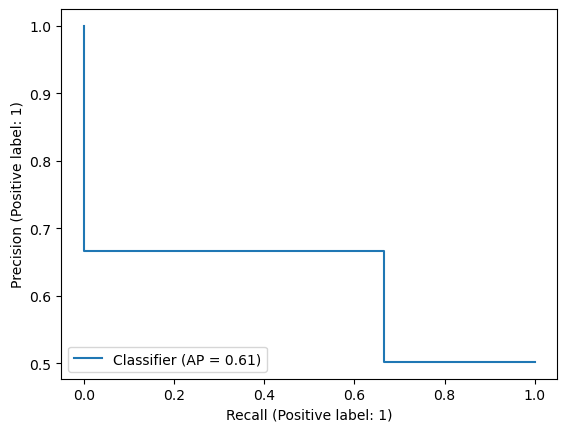

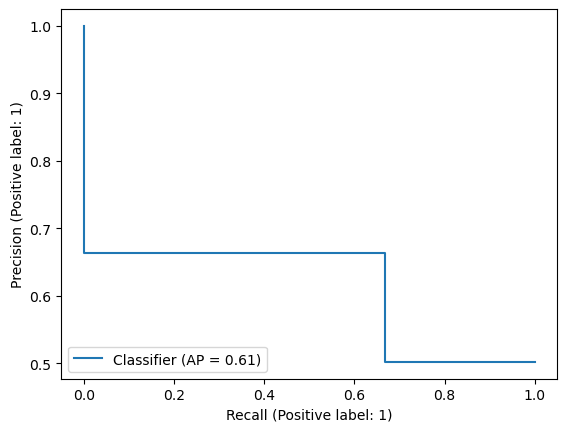

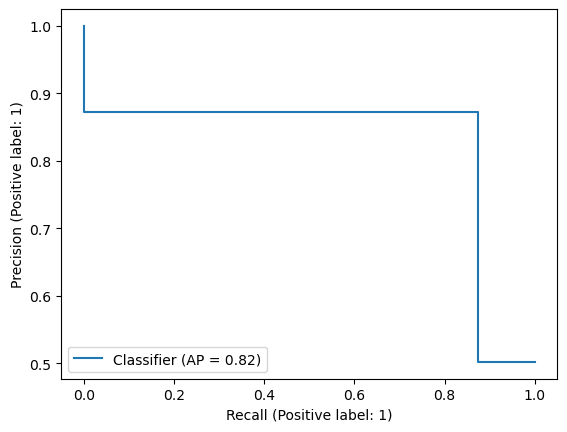

In [25]:
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)

# create model that predicts games win / loss based on previous game (n = 1) performance
# Test / Train Split
features = seasonAllStatSplitPred.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])

label = seasonAllStatSplitPred['present_win']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)
# create complex Logistic Regression  
log_model = LogisticRegression(max_iter=2000, verbose=2, random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

clear_output(wait=True)

##################
rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)
print('Ridge Classifier: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_rr)))
print('Ridge Classifier - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_rr, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_rr)
####################
print('Logistic Regression: ' + '\t' + str(metrics.accuracy_score(y_test, y_pred_log)))
print('Logistic Regression - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_log, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_log)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest: ' + '\t\t' + str(metrics.accuracy_score(y_test, y_pred_rf)))
print('Random Forest - Recall: ' + '\t' + str(metrics.recall_score(y_test, y_pred_rf, average='macro')))
metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf)

In [26]:
# nba_teams_name.sort()
# nba_teams_name

In [27]:
# Test / Train Split
def randomForest(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        rf = RandomForestClassifier(random_state=42)
        rf.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        # log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        # log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        ynew = rf.predict(testTestTestTest)
        # ynew = log_model.predict(testTestTestTest)

        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))
    
    return [(home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)), 
            (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count))]

In [28]:
# Test / Train Split
def ridgeClassifier(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        rr = RidgeClassifier(alpha = 1)
        rr.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        # log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        # log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        ynew = rr.predict(testTestTestTest)
        # ynew = log_model.predict(testTestTestTest)

        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))
    
    return [(home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)), 
            (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count))]

In [29]:
# Test / Train Split
def logRegression(features_in, label_in, team_home, team_away):
    home_win_avg_list = list()
    away_win_avg_list = list()

    for i in range(10):  

        x_train, x_test, y_train, y_test = train_test_split(features_in, label_in, test_size = 0.3)

        # rf = RandomForestClassifier(random_state=42)
        # rf.fit(x_train, y_train)
        # y_pred_rf = rf.predict(x_test)

        log_model = LogisticRegression(max_iter=20000, verbose=2, random_state=42)
        log_model.fit(x_train, y_train)
        # y_pred_log = log_model.predict(x_test)

        testTestTest = pd.DataFrame([team_home, team_away])
        testTestTestTest = testTestTest.drop(columns = ['game_id', 'game_date', 'team_name', 'opp_name', 'present_win'])
        # make a prediction
        # ynew = rf.predict(testTestTestTest)
        ynew = log_model.predict(testTestTestTest)
        # print("Predicted Home Win = %s" % ynew[0])
        home_win_avg_list.append(ynew[0])
        # print("Predicted Away Win = %s" % ynew[1])
        away_win_avg_list.append(ynew[1])

        # clear_output(wait=True)

    print("Final predicted win: ")
    print("Predicted %s Home Win = %s" % (home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(home_win_avg_list).value_counts()) / (len(home_win_avg_list)) * 100)))
    print("Predicted %s Away Win = %s" % (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count)))
    print("Confidence: {}".format(((pd.Series(away_win_avg_list).value_counts()) / (len(away_win_avg_list)) * 100)))
    
    return [(home_name, max(set(home_win_avg_list), key = home_win_avg_list.count)), 
            (away_name, max(set(away_win_avg_list), key = away_win_avg_list.count))]

In [30]:
#########################################################################################################

In [31]:
# Query nba.live.endpoints.scoreboard and  list games in localTimeZone

# from datetime import datetime, timezone
# from dateutil import parser
# from nba_api.live.nba.endpoints import scoreboard

# f = "{gameId}: {homeTeam} vs. {awayTeam}" 

# game_pair = list()

# board = scoreboard.ScoreBoard()
# print("ScoreBoardDate: " + board.score_board_date)
# games = board.games.get_dict()
# for game in games:
#     gameTimeLTZ = parser.parse(game["gameTimeUTC"]).replace(tzinfo=timezone.utc).astimezone(tz=None)
#     print(f.format(gameId=game['gameId'], 
#                    awayTeam=(game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName']), 
#                    homeTeam=(game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName'])))
#     if ((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName'])) == 'LA Clippers':
#         game_pair.append(('Los Angeles Clippers', (game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])))
#     elif ((game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])) == 'LA Clippers':
#         game_pair.append(((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName']), 'Los Angeles Clippers'))
#     else: 
#         game_pair.append(((game['homeTeam']['teamCity']) + ' ' + (game['homeTeam']['teamName']), (game['awayTeam']['teamCity']) + ' ' + (game['awayTeam']['teamName'])))

In [32]:
#########################################################################################################

In [35]:
import requests
import json
from datetime import datetime, timedelta

# Get Tomorrow
tomorrow = (datetime.now() + timedelta(1)).strftime('%Y-%m-%d')
print(tomorrow)

# Configure API
game_url = "https://api-nba-v1.p.rapidapi.com/games"
querystring = {"date":tomorrow,"league":"standard","season":"2022"}
headers = {"X-RapidAPI-Key": "028ebce187msh6a4b26b5230d49fp10210cjsnc09d3a7c2ecf", "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"}

# Request tomorrows games
next_game_response = json.loads((requests.request("GET", game_url, headers=headers, params=querystring).text))['response']

# Build Games List
game_pair = list()
for game in next_game_response:
    if 'Clippers' in game['teams']['home']['name']:
        tamp_game_pair = ('Los Angeles Clippers', game['teams']['visitors']['name'])
    if 'Clippers' in game['teams']['visitors']['name']:
        tamp_game_pair = (game['teams']['home']['name'], 'Los Angeles Clippers')
    if ('Clippers' not in game['teams']['home']['name']) and ('Clippers' not in game['teams']['visitors']['name']):
        tamp_game_pair = (game['teams']['home']['name'], game['teams']['visitors']['name'])
    game_pair.append(tamp_game_pair)
    print(tamp_game_pair)

2023-03-08
('Detroit Pistons', 'Portland Trail Blazers')
('Orlando Magic', 'Milwaukee Bucks')
('New York Knicks', 'Charlotte Hornets')
('Minnesota Timberwolves', 'Philadelphia 76ers')
('Houston Rockets', 'Brooklyn Nets')
('Oklahoma City Thunder', 'Golden State Warriors')
('Dallas Mavericks', 'Utah Jazz')
('Los Angeles Lakers', 'Memphis Grizzlies')


In [36]:
seasonAllStatSplitPredDict = seasonAllStatSplitPred.to_dict('records')
# seasonAllStatSplitPredDict.reverse()

# final list which send sure things
pickList = list()

for game in game_pair:

    resultList = list()
    
    home_name = game[0]
    away_name = game[1]

    Home_ID = nba_teams_tri[nba_teams_name.index(home_name)]
    Away_ID = nba_teams_tri[nba_teams_name.index(away_name)]

    gamePairList_one = list()
    gamePairList_one_elo = list()
    gamePairList_Two = list()
    gamePairList_Two_elo = list()
    for game in seasonAllStatSplitPredDict:
        if game['team_name'] == Home_ID and game['opp_name'] == Away_ID:
            gamePairList_one.append(game)
        if game['team_name'] == Away_ID and game['opp_name'] == Home_ID:
            gamePairList_Two.append(game)
        if game['team_name'] == Home_ID:
            gamePairList_one_elo.append(game)
        if game['team_name'] == Away_ID:
            gamePairList_Two_elo.append(game)

    teamHome = gamePairList_one[1].copy()
    teamHome['present_team_elo'] = (gamePairList_one_elo[0]['team_elo'] * 0.75) + (0.25 * 1505)
    teamHome['present_opp_elo'] = (gamePairList_Two_elo[0]['opp_elo'] * 0.75) + (0.25 * 1505)
    teamHome['present_home_court'] = 1
    teamAway = gamePairList_Two[1].copy() 
    teamAway['present_team_elo'] = (gamePairList_Two_elo[0]['team_elo'] * 0.75) + (0.25 * 1505)
    teamAway['present_opp_elo'] = (gamePairList_one_elo[0]['opp_elo'] * 0.75) + (0.25 * 1505)
    teamAway['present_home_court'] = 0
    
    print('###################################################################################')
    resultRF = randomForest(features, label, teamHome, teamAway)
    resultList.append(resultRF)
    print()
    resultRC = ridgeClassifier(features, label, teamHome, teamAway)
    resultList.append(resultRC)
    print()
    resultLR = logRegression(features, label, teamHome, teamAway)
    resultList.append(resultLR)
    print()
    print('###################################################################################')
    
    print('***********************************************************************************')
#     show only 'sure things' --> when all classifiers agree with eachther
    if (resultList[0][0] == resultList[1][0]) and (resultList[0][0] == resultList[2][0]):
        if (resultList[1][1] == resultList[1][1]) and (resultList[0][1] == resultList[2][1]):
            pickList.append([resultList[0][0], resultList[0][1]])
            pickList.append('\n')      
            pickList.append('\n')  
    print('***********************************************************************************')

###################################################################################
Final predicted win: 
Predicted Detroit Pistons Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Portland Trail Blazers Away Win = 1
Confidence: 1    100.0
dtype: float64

Final predicted win: 
Predicted Detroit Pistons Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Portland Trail Blazers Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Detroit Pistons Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Portland Trail Blazers Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Orlando Magic Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Milwaukee Bucks Away Win = 1
Confidence: 1    100.0
dtype: float64

Final predicted win: 
Predicted Orlando Magic Home Win = 0
Confidence: 0    80.0
1    20.0
dtype: float64
Predicted Milwaukee Bucks Away Win = 0
Confidence: 0    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Orlando Magic Home Win = 0
Confidence: 0    90.0
1    10.0
dtype: float64
Predicted Milwaukee Bucks Away Win = 0
Confidence: 0    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted New York Knicks Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Charlotte Hornets Away Win = 0
Confidence: 0    100.0
dtype: float64

Final predicted win: 
Predicted New York Knicks Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Charlotte Hornets Away Win = 0
Confidence: 0    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted New York Knicks Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Charlotte Hornets Away Win = 0
Confidence: 0    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Minnesota Timberwolves Home Win = 1
Confidence: 1    60.0
0    40.0
dtype: float64
Predicted Philadelphia 76ers Away Win = 0
Confidence: 0    60.0
1    40.0
dtype: float64

Final predicted win: 
Predicted Minnesota Timberwolves Home Win = 0
Confidence: 0    80.0
1    20.0
dtype: float64
Predicted Philadelphia 76ers Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Minnesota Timberwolves Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Philadelphia 76ers Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Houston Rockets Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Brooklyn Nets Away Win = 1
Confidence: 1    100.0
dtype: float64

Final predicted win: 
Predicted Houston Rockets Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Brooklyn Nets Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Houston Rockets Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Brooklyn Nets Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Golden State Warriors Away Win = 1
Confidence: 1    100.0
dtype: float64

Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Golden State Warriors Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Oklahoma City Thunder Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Golden State Warriors Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Dallas Mavericks Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Utah Jazz Away Win = 1
Confidence: 1    100.0
dtype: float64

Final predicted win: 
Predicted Dallas Mavericks Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Utah Jazz Away Win = 1
Confidence: 1    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Dallas Mavericks Home Win = 0
Confidence: 0    100.0
dtype: float64
Predicted Utah Jazz Away Win = 1
Confidence: 1    100.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************
###################################################################################
Final predicted win: 
Predicted Los Angeles Lakers Home Win = 0
Confidence: 0    90.0
1    10.0
dtype: float64
Predicted Memphis Grizzlies Away Win = 1
Confidence: 1    70.0
0    30.0
dtype: float64

Final predicted win: 
Predicted Los Angeles Lakers Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Memphis Grizzlies Away Win = 0
Confidence: 0    100.0
dtype: float64



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Final predicted win: 
Predicted Los Angeles Lakers Home Win = 1
Confidence: 1    100.0
dtype: float64
Predicted Memphis Grizzlies Away Win = 0
Confidence: 0    70.0
1    30.0
dtype: float64

###################################################################################
***********************************************************************************
***********************************************************************************


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


In [68]:
import base64
import codecs

# Decoding the Base32 bytes to string
string_encoded = 'NU3US2DTN5NDKTSTK53XSV2PMZVUM3T2HF3UMNZQ'
string_encoded_UTF = string_encoded.encode("UTF-8")
# Decoding the Base32 bytes
decoded_base32 = base64.b32decode(string_encoded_UTF)
# Decoding the bytes to string
message_key = d.decode("UTF-8")

if not pickList:
    message = "No Picks Today"
else:
    message = ''.join(str(e) for e in pickList)

client = messagebird.Client(message_key)
message = client.message_create(
      'Picks',
      '+61434068725',
      message,
      { 'reference' : 'Foobar' }
  )

In [69]:
print(''.join(str(e) for e in pickList))

[('Detroit Pistons', 0), ('Portland Trail Blazers', 1)]

[('New York Knicks', 1), ('Charlotte Hornets', 0)]

[('Houston Rockets', 0), ('Brooklyn Nets', 1)]

[('Oklahoma City Thunder', 0), ('Golden State Warriors', 1)]

[('Dallas Mavericks', 0), ('Utah Jazz', 1)]


